# Import Libraries

In [322]:
import pandas as pd
import math
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [328]:
ucb = pd.read_csv('clean_airbnb.csv')

In [330]:
full_country_name = {
    'AU': 'Australia',
    'CA': 'Canada',
    'DE': 'Denmark',
    'ES': 'Spain',
    'FR': 'France',
    'GB': 'Great Britain',
    'IT': 'Italy',
    'NL': 'Netherlands',
    'PT': 'Portugal',
    'US': 'United States'
}

In [331]:
orig_ucb = ucb
ucb = ucb.loc[ucb['first_browser'] != 'Chrome Mobile']
ucb = ucb.loc[ucb['first_browser'] != 'Android Browser']
ucb = ucb.loc[ucb['first_browser'] != 'Opera']
ucb = ucb.loc[ucb['first_browser'] != 'AOL Explorer']
ucb = ucb.loc[ucb['first_browser'] != 'Chromium']
ucb = ucb.loc[ucb['first_browser'] != 'Silk']
ucb = ucb.loc[ucb['first_browser'] != 'BlackBerry Browser']
ucb = ucb.loc[ucb['first_browser'] != 'Apple Mail']
ucb = ucb.loc[ucb['first_browser'] != 'RockMelt']
ucb = ucb.loc[ucb['first_browser'] != 'Mobile Firefox']
ucb = ucb.loc[ucb['first_browser'] != 'Maxthon']
ucb = ucb.loc[ucb['first_browser'] != 'IceWeasel']
ucb = ucb.loc[ucb['first_browser'] != 'Camino']
ucb = ucb.loc[ucb['first_browser'] != 'Sogou Explorer']
ucb = ucb.loc[ucb['first_browser'] != 'Iron']
ucb = ucb.loc[ucb['first_browser'] != 'CoolNovo']
ucb = ucb.loc[ucb['first_browser'] != 'SiteKiosk']
ucb = ucb.loc[ucb['first_browser'] != 'Pale Moon']
ucb = ucb.loc[ucb['first_browser'] != 'TheWorld Browser']
ucb = ucb.loc[ucb['first_browser'] != 'wOSBrowser']
ucb = ucb.loc[ucb['first_browser'] != 'NetNewsWire']
ucb = ucb.loc[ucb['first_browser'] != 'Mozilla']
ucb = ucb.loc[ucb['first_browser'] != 'CometBird']
ucb = ucb.loc[ucb['first_browser'] != 'Opera Mini']
ucb = ucb.loc[ucb['first_browser'] != 'TenFourFox']
ucb = ucb.loc[ucb['first_browser'] != 'Stainless']
ucb = ucb.loc[ucb['first_browser'] != 'IE Mobile']

In [334]:
'{} - {}'.format(orig_ucb.age.count(), ucb.age.count())

'52695 - 52099'

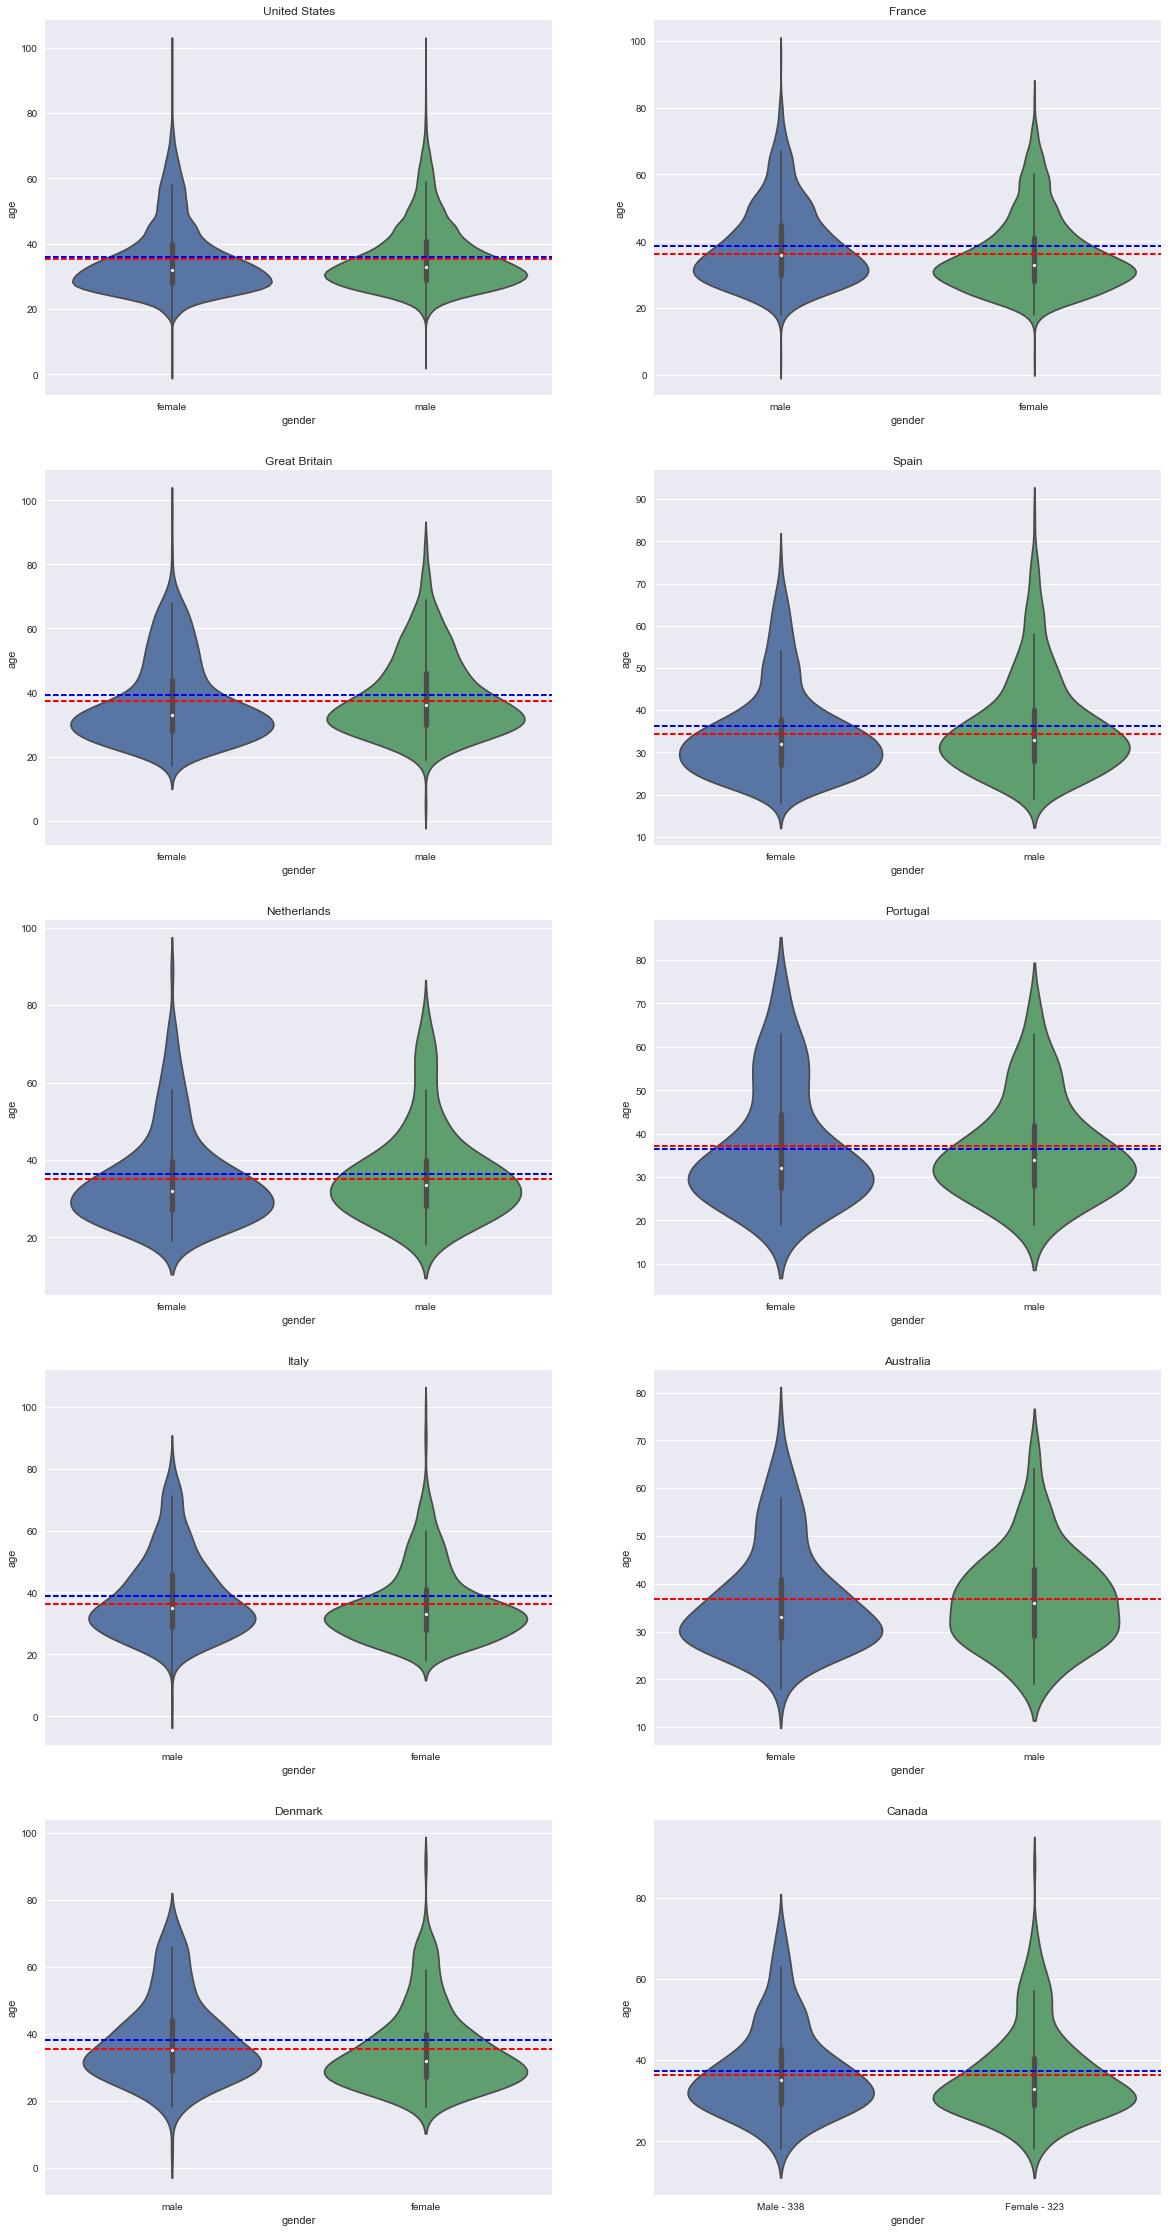

In [249]:
num_plots = 10
fig, axes = plt.subplots(5,2,figsize=(20,40))

def buckets(i):
    return [ucb.country_destination.unique()[i]]

# iterate through all axes and create a violin plot
for i in range(num_plots):
    data = ucb[ucb.country_destination.isin(buckets(i))]
    
    male_count = data.loc[data['gender'] == 'male']['gender'].count()
    fem_count = data.loc[data['gender'] == 'female']['gender'].count()
    
    male_mean = data.loc[data['gender'] == 'male'].age.mean()
    female_mean = data.loc[data['gender'] == 'female'].age.mean()
    
    objects = ('Male - {}'.format(male_count), 'Female - {}'.format(fem_count))
    y_pos = np.arange(len(objects))
    
    row = i // 2
    col = i % 2
    ax_curr = axes[row, col]
    
    title = full_country_name[buckets(i)[0]]
        
    sns.violinplot(x="gender", y="age", data=data, ax=ax_curr)
    ax_curr.set_title(title)
    ax_curr.axhline(male_mean, color='b', linestyle='dashed', linewidth=2)
    ax_curr.axhline(female_mean, color='r', linestyle='dashed', linewidth=2)

    plt.xticks(y_pos, objects)

plt.show()

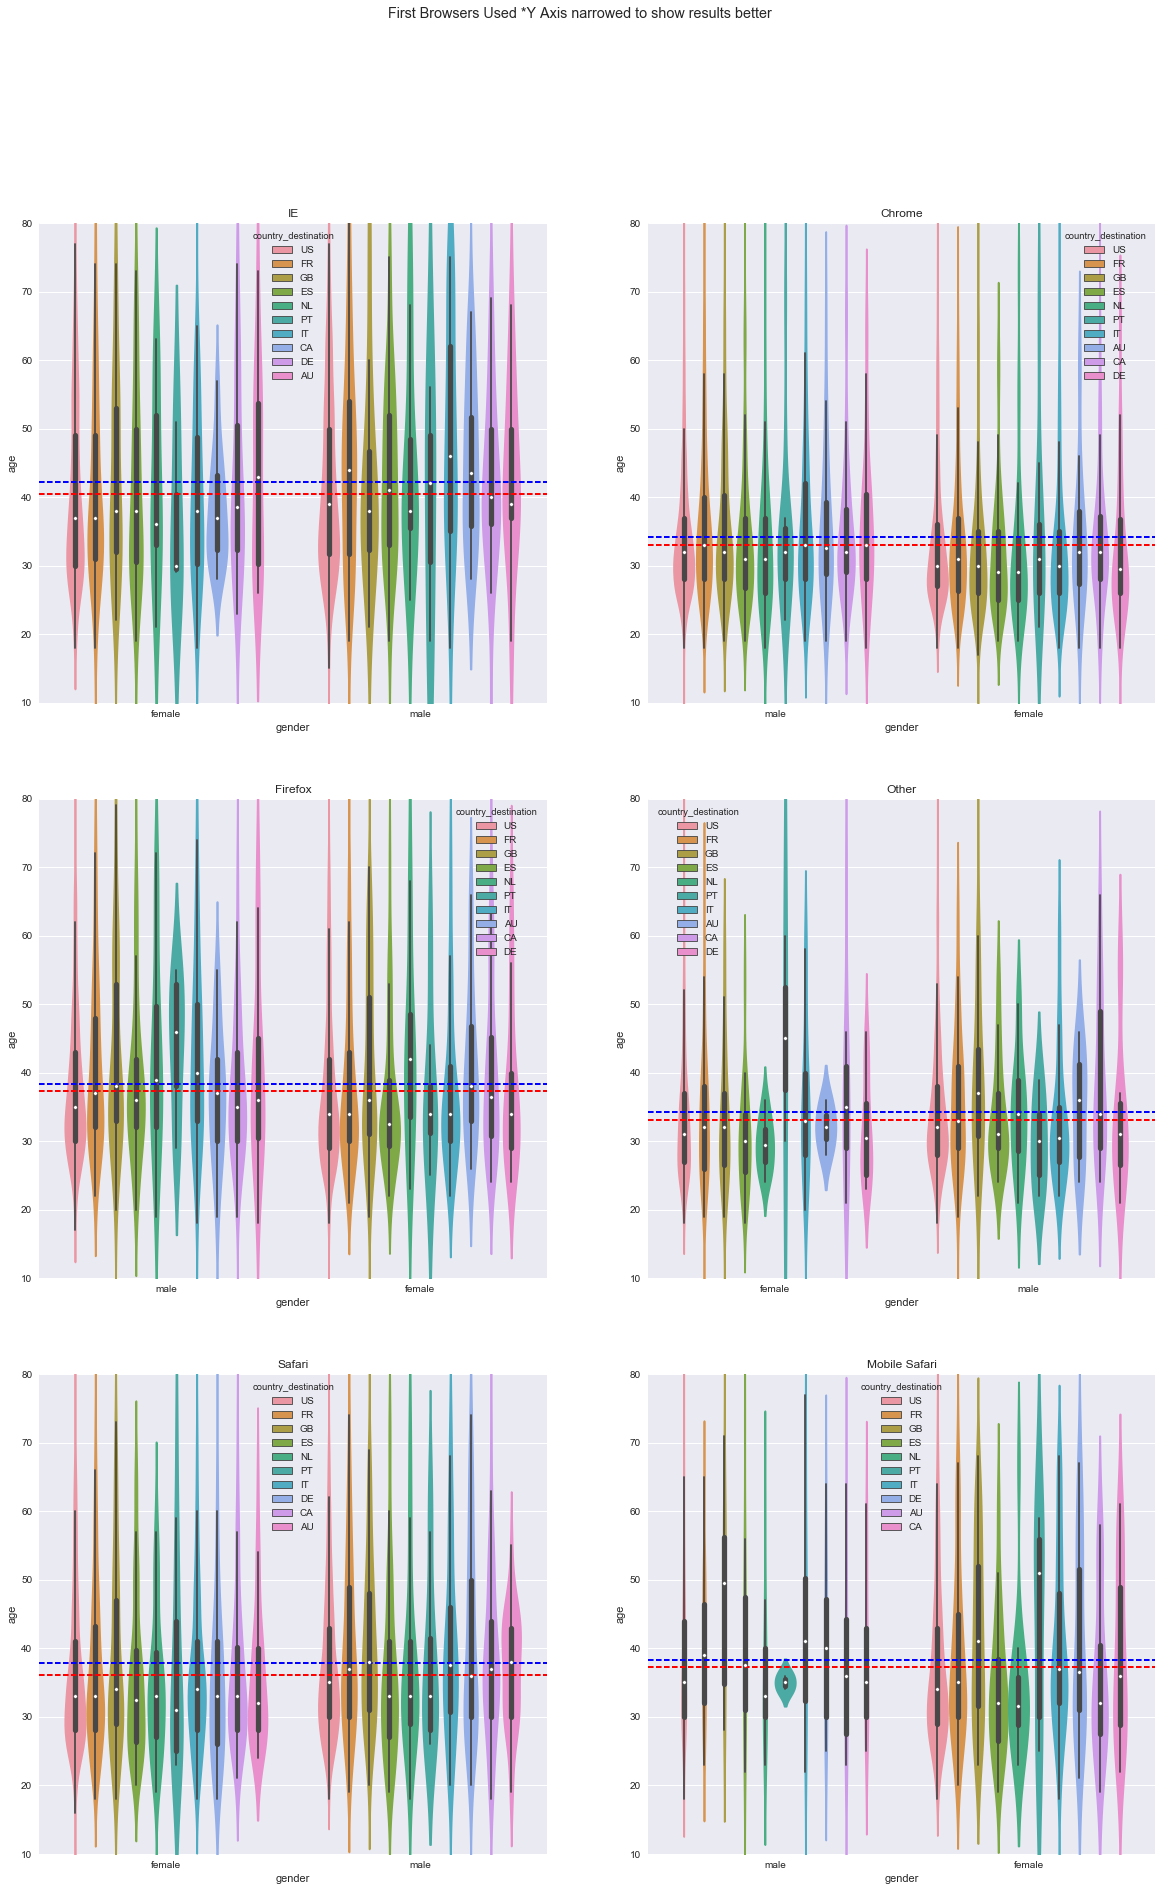

In [245]:
num_plots = 6
fig, axes = plt.subplots(3,2,figsize=(20,30))

def buckets(i):
    return [ucb.first_browser.unique()[i]]

for i in range(num_plots):
    data = ucb[ucb.first_browser.isin(buckets(i))]
    
    male_mean = data.loc[data['gender'] == 'male'].age.mean()
    female_mean = data.loc[data['gender'] == 'female'].age.mean()
    
    row = i // 2
    col = i % 2
    ax_curr = axes[row, col]
    
    title = buckets(i)[0]
        
    vp = sns.violinplot(x="gender", y="age", data=data, ax=ax_curr, hue='country_destination') 
    vp.set(ylim=(10, 80))
    ax_curr.set_title(title)
    ax_curr.axhline(male_mean, color='b', linestyle='dashed', linewidth=2)
    ax_curr.axhline(female_mean, color='r', linestyle='dashed', linewidth=2)
    
fig.suptitle('First Browsers Used *Y Axis narrowed to show results better')
plt.show()

In [213]:
ucb.columns

Index(['country_destination', 'gender', 'dest_age_pop', 'age', 'id',
       'date_account_created', 'timestamp_first_active', 'date_first_booking',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'lat_destination',
       'lng_destination', 'distance_km', 'destination_km2',
       'destination_language ', 'time_to_book', 'time_days_to_book',
       'time__days_to_book'],
      dtype='object')

In [259]:
distance_fem = ucb.loc[ucb['gender'] == 'female']['distance_km'].mean()
distance_male = ucb.loc[ucb['gender'] == 'male']['distance_km'].mean()
'{} {}'.format(distance_male, distance_fem)
x = ['distance traveled by male', 'distance traveled by female']
y = [distance_male, distance_fem]

dist_under_18 = ucb.loc[ucb['age'] <= 18]['distance_km'].mean()
dist_19_25 = ucb.loc[ucb['age'] >= 19].loc[ucb['age'] < 26]['distance_km'].mean()
dist_26_31 = ucb.loc[ucb['age'] >= 26].loc[ucb['age'] < 32]['distance_km'].mean()
dist_32_40 = ucb.loc[ucb['age'] >= 32].loc[ucb['age'] < 41]['distance_km'].mean()
dist_41_50 = ucb.loc[ucb['age'] >= 41].loc[ucb['age'] < 51]['distance_km'].mean()
dist_51_60 = ucb.loc[ucb['age'] >= 51].loc[ucb['age'] < 61]['distance_km'].mean()
dist_61_up = ucb.loc[ucb['age'] >= 61]['distance_km'].mean()
x_age = ['>19', '19-25', '26-31', '32-40', '41-50', '51-60', '60+']
y_age = [dist_under_18, dist_19_25, dist_26_31, dist_32_40, dist_41_50, dist_51_60, dist_61_up]

su_facebook = ucb.loc[ucb['signup_method'] == 'facebook']['distance_km'].mean()
su_google = ucb.loc[ucb['signup_method'] == 'google']['distance_km'].mean()
su_basic = ucb.loc[ucb['signup_method'] == 'basic']['distance_km'].mean()
x_sup = ['Facebook', 'Google', 'Basic']
y_sup = [su_facebook, su_google, su_basic]

suapp_web = ucb.loc[ucb['signup_app'] == 'Web']['distance_km'].mean()
suapp_ios = ucb.loc[ucb['signup_app'] == 'iOS']['distance_km'].mean()
suapp_android = ucb.loc[ucb['signup_app'] == 'Moweb']['distance_km'].mean()
suapp_moweb = ucb.loc[ucb['signup_app'] == 'Android']['distance_km'].mean()
x_suapp = ['Web', 'iOS', 'Android', 'Moweb']
y_suapp = [suapp_web, suapp_ios, suapp_android, suapp_moweb]

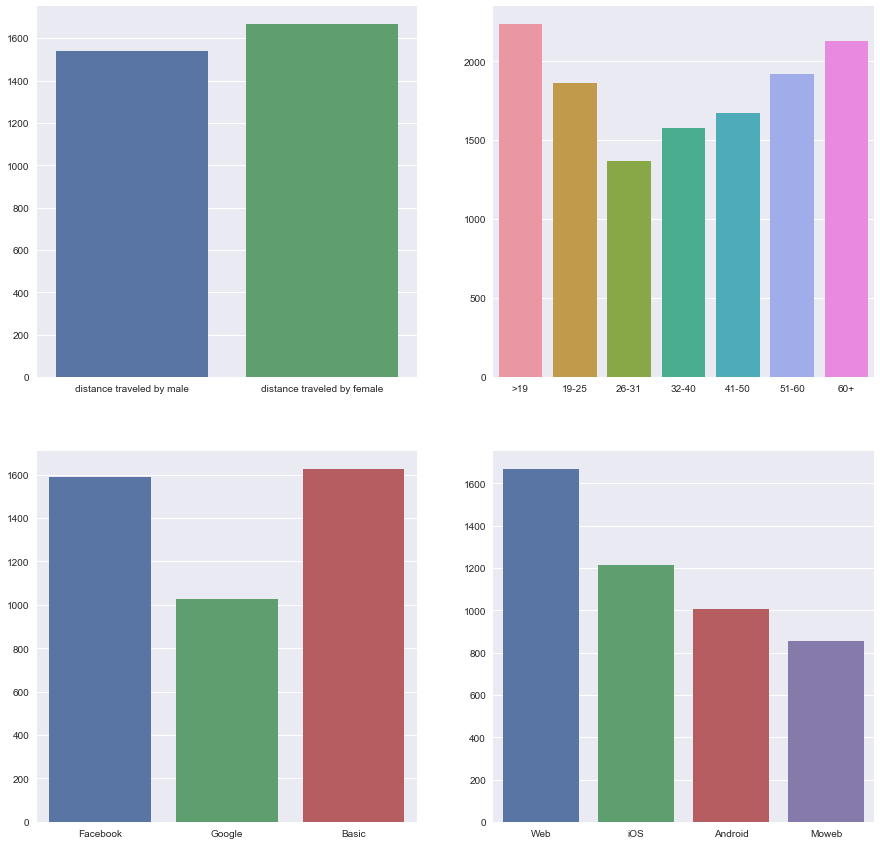

In [275]:
num_plots = 4
fig, axes = plt.subplots(2,2,figsize=(15,15))

sns.barplot(x, y, ax=axes[0, 0])
sns.barplot(x_age, y_age, ax=axes[0, 1])
sns.barplot(x_sup, y_sup, ax=axes[1, 0])
sns.barplot(x_suapp, y_suapp, ax=axes[1, 1])
plt.show()

In [286]:
ucb = ucb.sort_values('destination_km2', ascending=False)
fifths = ucb.iloc[0:1]['destination_km2'] / 5
fifths

480    1996934.0
Name: destination_km2, dtype: float64

In [338]:
x_small = ucb.loc[ucb['destination_km2'] < 2000000].age.mean()
small = ucb.loc[ucb['destination_km2'] >= 2000000].loc[ucb['destination_km2'] < 4000000]
medium = ucb.loc[ucb['destination_km2'] >= 4000000].loc[ucb['destination_km2'] < 6000000]
large = ucb.loc[ucb['destination_km2'] >= 6000000].age.mean()

def getCountrySize(row):
    if row['destination_km2'] < 5000000:
        return 'small'
    else:
        return 'large'

ucb['size_dest'] = ucb.apply(lambda x: getCountrySize(x), axis=1)
ucb.head(10)

,country_destination,gender,dest_age_pop,age,id,date_account_created,timestamp_first_active,date_first_booking,signup_method,signup_flow,...,FR,IT,GB,ES,CA,DE,NL,AU,PT,size_dest
0,AU,male,415000,71,e2jv79axh0,2014-01-13,20140113191425,2014-01-13,basic,0,...,0,0,0,0,0,0,0,1,0,large
1,AU,male,415000,73,5uzn5yqyz6,2012-10-21,20121021012712,2012-10-21,facebook,12,...,0,0,0,0,0,0,0,1,0,large
2,AU,male,574000,68,1xc8hpc77c,2013-10-08,20131008180536,2013-10-09,basic,0,...,0,0,0,0,0,0,0,1,0,large
3,AU,male,574000,69,6v9qw4yev2,2014-02-03,20140203180026,2014-02-04,facebook,0,...,0,0,0,0,0,0,0,1,0,large
4,AU,male,636000,62,ewv7zn4r7k,2014-03-01,20140301172819,2014-03-12,facebook,0,...,0,0,0,0,0,0,0,1,0,large
5,AU,male,636000,64,bpfyz7z5qg,2012-06-12,20120612231354,2012-08-06,facebook,0,...,0,0,0,0,0,0,0,1,0,large
6,AU,male,636000,64,ez7f9by7fy,2013-02-06,20130206050929,2013-02-06,basic,0,...,0,0,0,0,0,0,0,1,0,large
7,AU,male,714000,55,oymepyonsd,2012-11-14,20121114110906,2013-01-12,facebook,0,...,0,0,0,0,0,0,0,1,0,large
8,AU,male,714000,55,1hr9x2eu7t,2014-03-30,20140330164810,2014-04-03,basic,0,...,0,0,0,0,0,0,0,1,0,large
9,AU,male,714000,57,h78n2008h3,2013-03-20,20130320211423,2013-03-25,basic,0,...,0,0,0,0,0,0,0,1,0,large


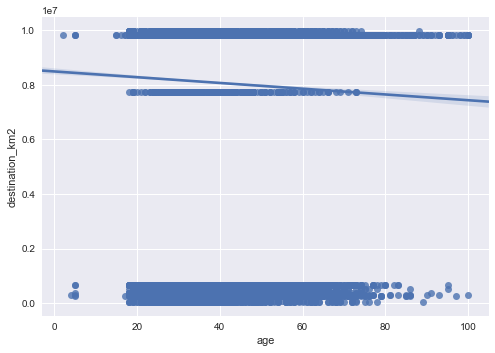

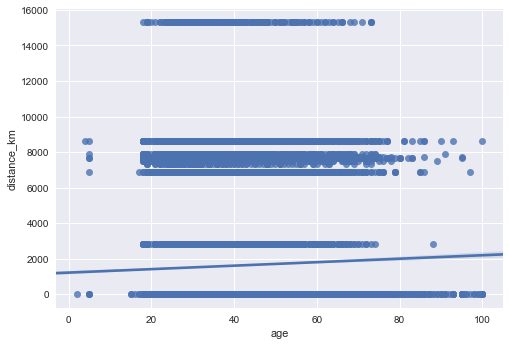

In [339]:
des = sns.regplot('age', 'destination_km2', data=ucb)
plt.show()

dis = sns.regplot('age', 'distance_km', data=ucb)
plt.show()

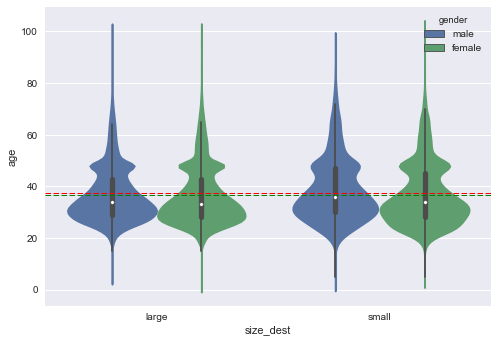

37.51001687051877

In [340]:
dest = sns.violinplot('size_dest', 'age', data=ucb, hue='gender')
dest.axhline(x_small, color='r', linestyle='dashed', linewidth=1)
dest.axhline(large, color='g', linestyle='dashed', linewidth=1)
plt.show()

x_small

## It is faint but there is some correlation between country size, and getting older. The older you get, it seems more likely that you will visit a small country

In [341]:
# Maybe look to see if there is some correlation with someones age, and the population buckets
# of the country they are going to. For example what is the average percent of the population
# of the country they are going to, that matches their age. Use distance on more countries.